# Stochastic Multi-Armed Bandits - Value Estimation
These examples come from Chapter 2 of [Reinforcement Learning: An Introduction](https://webdocs.cs.ualberta.ca/~sutton/book/the-book.html) by Sutton and Barto (2nd ed. rev: Oct2015)

In [1]:
%matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import bandits as bd

The example test environment used in the book is a stochastic 10-arm bandit with action values normally distributed with zero mean and unit variance. The reward from each arm is itself normally distributed with mean equal to the action value of the arm and unit variance.

In the book, they show the average reward and percentage of optimal choice made over 2000 experiments of 1000 trials each, where each experiment corresponds to a different random selection of arm action values. To speed up the simulation time, we limt the number of experiments here to 500.

In [2]:
n_arms = 10
bandit = bd.GaussianBandit(n_arms)
n_trials = 1000
n_experiments = 500

## Epsilon-Greedy
Here we introduce the Epsilon-Greedy policy, which, on each trial, either randomly explores the choices with probability epsilon or exploits the apparent best choice with probabilty 1-epsilon.

epsilon = 0.1 is a common choice, which explores the set of choices 10% of the time.

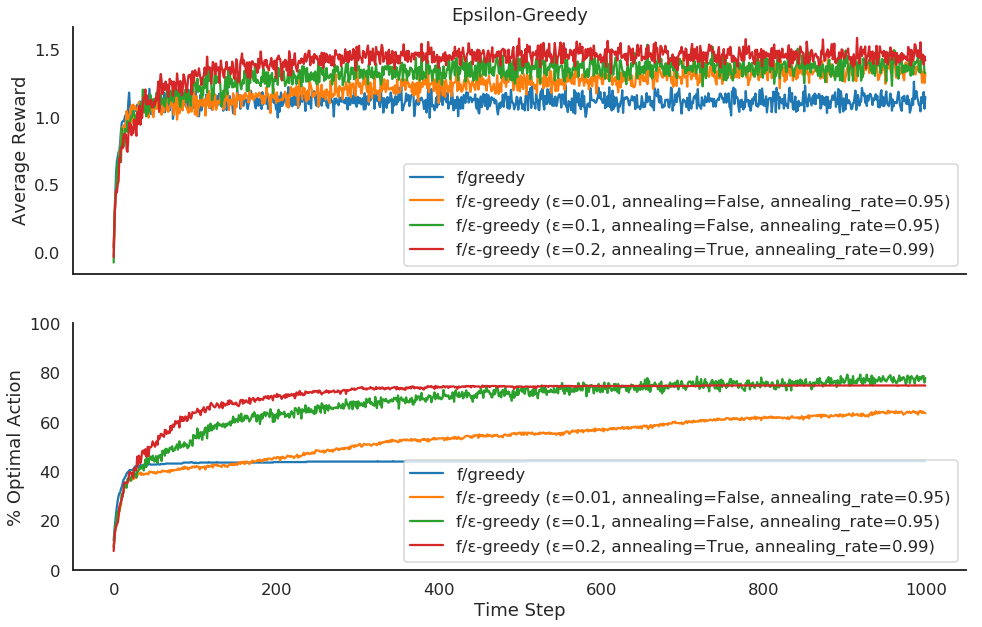

In [4]:
agents = [
    bd.Agent(bandit, bd.GreedyPolicy()),
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.01)),
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.1)),
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.2, annealing=True, annealing_rate=.99))
]
env = bd.Environment(bandit, agents, 'Epsilon-Greedy')
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)

## Optimistic Initial Values

If our initial value estimates are low, the basic greedy approach will latch on to the first positive result and never try anything else. However, if we start with a high initial estimate, this has the effect of inducing early exploration as the estimates are driven down.

By default our reward estimates are 0, but let's try starting with a prior expectation of 5.

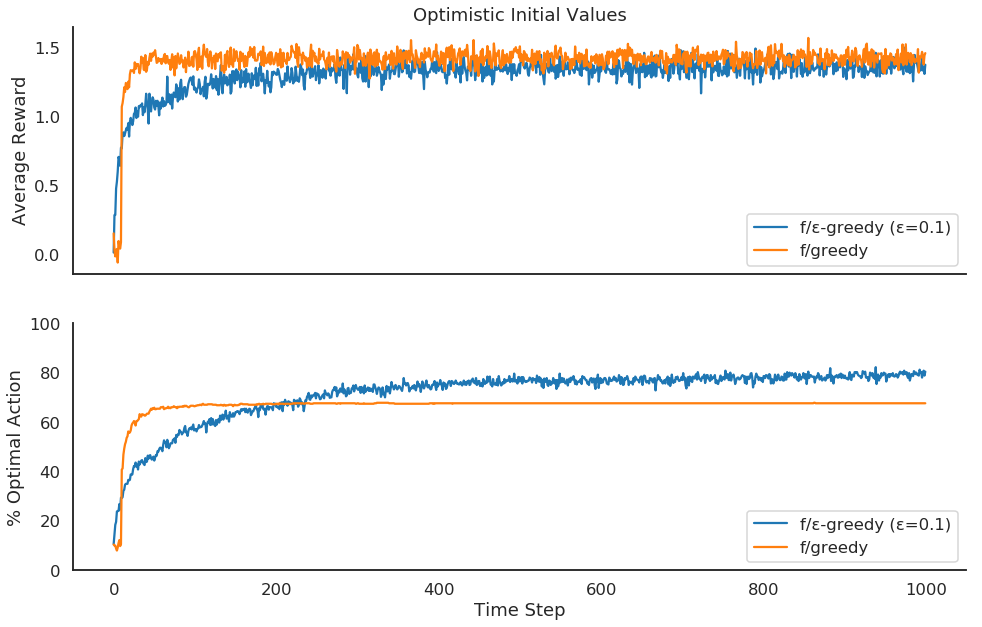

In [5]:
agents = [
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.1)),
    bd.Agent(bandit, bd.GreedyPolicy(), prior=5)
]
env = bd.Environment(bandit, agents, 'Optimistic Initial Values')
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)

## Upper Confidence Bound (UCB1)
Instead of randomly exploring arms, it would be better to try arms that we have less condifence in our estimates. The UCB1 algorithm provides a straightforward way to do this by adding in an exploration factor (based on the number of times the arm has been selected in the past) to the existing value estimate and then greedily selects the modified estiamtes.

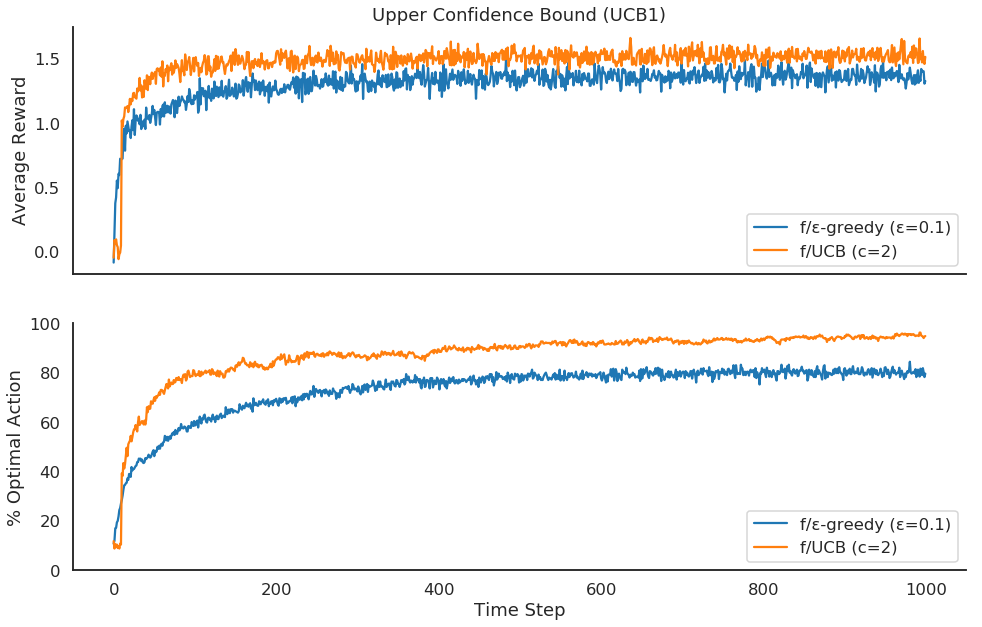

In [4]:
agents = [
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.1)),
    bd.Agent(bandit, bd.UCBPolicy(2))
]
env = bd.Environment(bandit, agents, 'Upper Confidence Bound (UCB1)')
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)